In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

In [3]:
df = pd.read_csv('/home/jupyter-v-lobanova-17/stat_10/hw_aa.csv', sep=';')

In [7]:
df.head()
#experimentVariant – вариант эксперимента
#version – версия приложения
#purchase – факт покупки

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


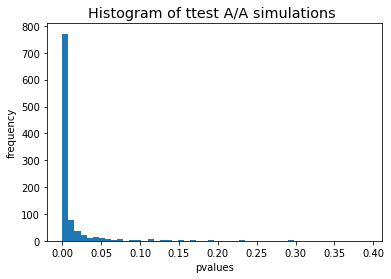

0.937

In [5]:
n = 100000 
simulations = 1000 
n_s = 1000 
res = [] 



for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()


sum(np.array(res) <0.05) / simulations

Проведя А/А тест получили, что в 94% случаях получаем стат. значимые различия.

In [21]:
df.groupby(['experimentVariant', 'version'], as_index=False) \
  .agg({'purchase': 'mean', 'Unnamed: 0': 'count'})

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


В результате подсчета конверсии, с группипровкой по варианту и версии МП стало видно, что конверсия experimentVariant = 0 и версии МП v2.8.0 отличается от конверсии в этой же версии в experimentVariant = 1.
Посчитав pvalue для каждой версии МП, получилось, что для версии v2.8.0 pvalue > 0.05

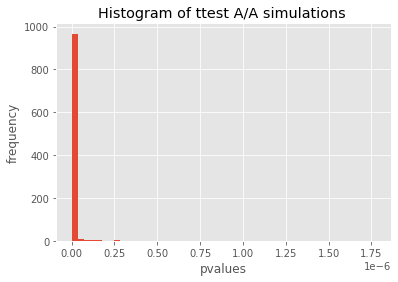

1.0

In [18]:
n = 100000 #размер ориг. выборки
simulations = 1000 #количество симуляций
n_s = 1000 #кол-во пользователей в кол-ве наблюдений в подвыборке
res = [] #результаты по pvalue


# Запуск симуляций A/A теста
#проводим расчеты вот столько simulations кол-во раз
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version == 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version == 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations 

Повторный тест без версии v2.8.0

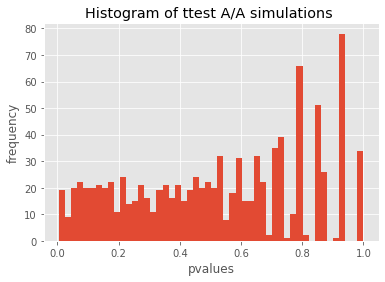

0.036

In [21]:
n = 100000 
simulations = 1000 
n_s = 1000 
res = [] 



for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) 

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()


sum(np.array(res) <0.05) / simulations